In this project I will be using a .csv file from my ebay store to visualize and findout my gross and net sales per month in 2022.
As well as figuring out the difference between the two to calculate costs such as shipping and fees per month. I will also be looking for the average sale price per item, as well as visualizing where orders are coming from in the US. 

## Read Data
Read in data from a local csv,
excel file, json, or any other
file type. There are many
ways to do this, but using
Pandas read_ functions is
pretty easy. 

I chose to import a .csv file from my eBay store. I got a transaction report for Jan, 1 2022 - Jan, 1 2023.

## Manipulate and Clean Data

1. Use built-in pandas or numpy
functions to do things like
remove 0’s and null values
where they don’t belong in
your dataset. 

Here I used the .loc function in pandas to select the relevant columns from my dataframe to use in further data cleaning.





In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import calendar

pd.options.display.max_rows = 374
pd.options.display.max_columns = 374

df = pd.read_csv(r'Transaction-Report-Feb-03-2023-07_27_28-0700-1382246697.csv')
columns = df.loc[:, ['Transaction date' , 'Order number' , 'Buyer username' ,\
                      'Ship to province/region/state', 'Ship to zip', 'Ship to country' ,\
     'Net amount' , 'Item ID' , 'Transaction ID' , 'Item title' , 'Gross transaction amount'] ]

df.head(2)


,Transaction date,Type,Order number,Legacy order ID,Buyer username,Buyer name,Ship to city,Ship to province/region/state,Ship to zip,Ship to country,Net amount,Payout currency,Payout date,Payout ID,Payout method,Payout status,Reason for hold,Item ID,Transaction ID,Item title,Custom label,Quantity,Item subtotal,Shipping and handling,Seller collected tax,eBay collected tax,Final Value Fee - fixed,Final Value Fee - variable,"Very high ""item not as described"" fee",Below standard performance fee,International fee,Deposit processing fee,Gross transaction amount,Transaction currency,Exchange rate,Reference ID,Description
0,"Jan 1, 2023",Other fee,16-09530-33898,394317145657-1262258968026,tremor37,Tim Pratt,--,--,--,--,-1.66,USD,"Jan 4, 2023",5725864515,Central National Bank of Enid *3735,Funds sent,--,394317145657,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-1.66,USD,--,FEE-5162059151715,Ad Fee Standard
1,"Jan 1, 2023",Order,16-09530-33898,394317145657-1262258968026,tremor37,Tim Pratt,Belle Chasse,LA,70037-0667,US,19.00,USD,"Jan 4, 2023",5725864515,Central National Bank of Enid *3735,Funds sent,--,394317145657,1262258968026,The Bionic Woman: The Complete Series DVD with...,--,1,10,12.75,--,0.9,-0.3,-3.45,--,--,--,--,22.75,USD,--,--,--


## Manipulate and Clean Data 2

Here I removed all blanks in the data set. Since in this .csv file they were strings and tied to one specific column I made a new dataframe by removing the rows if that string was present. I also flipped the the dataframe to go in ascending order from Jan, 1 2022

In [29]:
columns_without_blanks = columns[columns['Transaction ID'] != "--"]
cols_by_date = columns_without_blanks.loc[:: -1]
cols_by_date.head(2)






,Transaction date,Order number,Buyer username,Ship to province/region/state,Ship to zip,Ship to country,Net amount,Item ID,Transaction ID,Item title,Gross transaction amount
373,"Jan 1, 2022",16-08077-65484,ruma_2034,CA,95123-4603,US,13.55,393725788988,1172866574026,The Orange Box: Half-Life 2 & Portal (Xbox 360...,16.0
371,"Jan 3, 2022",03-08088-91555,jamesth_1138,OR,97801-2990,US,13.87,393804431741,1173260955026,Sony PlayStation 2 Electronic Arts Need For Sp...,16.2


## Manipulate and Clean Data 3
I noticed my date was not in a datetime format so it was checked with the .info function. I then made a new df by date and added new columns to the df that broke down the year, month, and day in date time format. 

In [30]:
cols_by_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 373 to 1
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction date               105 non-null    object 
 1   Order number                   105 non-null    object 
 2   Buyer username                 105 non-null    object 
 3   Ship to province/region/state  105 non-null    object 
 4   Ship to zip                    105 non-null    object 
 5   Ship to country                105 non-null    object 
 6   Net amount                     105 non-null    float64
 7   Item ID                        105 non-null    object 
 8   Transaction ID                 105 non-null    object 
 9   Item title                     105 non-null    object 
 10  Gross transaction amount       105 non-null    float64
dtypes: float64(2), object(9)
memory usage: 9.8+ KB


In [31]:
cols_by_date['Transaction date'] = pd.to_datetime(cols_by_date['Transaction date'])
cols_by_date["Year"] = cols_by_date["Transaction date"].dt.year
cols_by_date["Month"] = cols_by_date["Transaction date"].dt.month_name().str.slice(stop=3)
cols_by_date["Day"] = cols_by_date["Transaction date"].dt.day

## Manipulate and Clean Your Data 4

Below I had an issue in which once I had aggregated some columns, and had gotten sums, averages, and subtracted some columns from one another the months were numbers 1-2. The issue came when I wanted to change those months to be represented as the abbreviation of the months. They would display alphabetically rather in ascending order. So I used the pandas date range function and created a list of the abbreviated months in order. 

In [32]:
dates_in_order = pd.date_range(start='2022-01-01', end='2023-01-01', freq='MS')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


Here I am using the groupby function in pandas to group the months of the year to get the sum and mean of the gross transactions per month. I am aggregating gross and net sales. When I finished this process the months displayed alphabetically instead of in order so above I made a list and categorized the months so it would display properly. Going further the totals of the gross and net were subtracted using lambda to add a new column to the dataframe showing the costs per month (fees and shipping). After sorting that issue I visualized the data into a group bar graph. 

## Analyze Your Data

Use at least 5 different built-in
Python functions to find out
something about your data. If
you had a list for example,
finding the length of that list
with len(<list>) does tell us a
little bit about the data.

and

Do 5 basic calculations with
Pandas, like finding the
sum(), median(), mean(), or
mode() of a column. You
could divide two columns by
each other. You could
multiple a column by a
random integer. You could
use string operations and find
the most common letter in a
given entry.

I decided to use a combination of both of these options. Below I first further whittled down my dataframe by using the Pandas groupby function and aggregated the "Month column. Then adding the sum of the Gross, and Net sales. I also added new columns for averages by getting the mean of the aggregated columns. I then used lambda to add a new column called "Costs". This is the difference between the gross and net sales for each month. I then rounded the numbers so they would look better in dollar form. 

In [33]:
sales_by_month = cols_by_date.groupby("Month").agg(
  gross_sales=('Gross transaction amount', np.sum,),
    net_sales=('Net amount', np.sum,), gross_avg=('Gross transaction amount', np.mean),\
        net_avg=('Net amount', np.mean))

sales_by_month['Costs'] = sales_by_month.apply(lambda row: row.gross_sales - row.net_sales, axis = 1)
sales_by_month.round(2)





,gross_sales,net_sales,gross_avg,net_avg,Costs
Month,,,,,
Apr,332.24,282.76,33.22,28.28,49.48
Aug,220.33,188.39,36.72,31.40,31.94
Dec,610.97,523.20,55.54,47.56,87.77
Jan,93.05,78.44,18.61,15.69,14.61
Jul,379.86,325.42,47.48,40.68,54.44
Jun,230.82,196.87,38.47,32.81,33.95
Mar,450.75,385.06,64.39,55.01,65.69
May,223.54,190.19,27.94,23.77,33.35
Nov,685.73,588.15,36.09,30.96,97.58


## Visualize Your Data

Make 2 basic plots with
matplotlib, seaborn, or any
other kind of visualization
library that you think looks
interesting.

Here I used Matplotlib to make a grouped bar chart showing the chosen aggregated columns by month. Customizing a legend and titles. 
Also this is where the changes I made to the months above were used to make the Month column categorical so it would display in the correct order.

<function matplotlib.pyplot.show(close=None, block=None)>

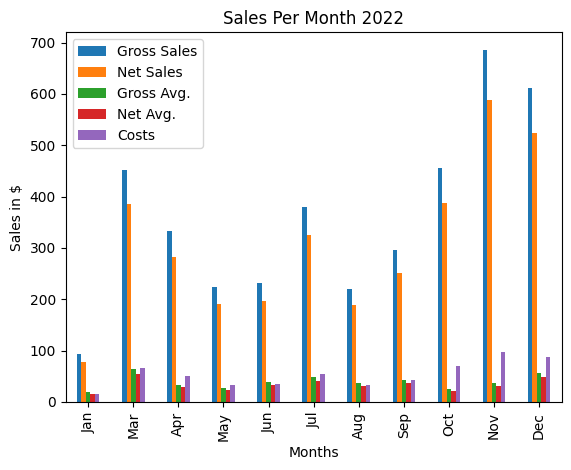

In [34]:
sales_by_month_order = sales_by_month.sort_values('Month', key = lambda x : pd.Categorical(x, categories=months, ordered=True))
sales_by_month_order[["gross_sales", "net_sales", "gross_avg", "net_avg", "Costs"]].plot(
    kind="bar", stacked=False, legend=True)
figsize=(12,8)

plt.title("Sales Per Month 2022")
plt.xlabel("Months")
plt.ylabel("Sales in $")
plt.legend(['Gross Sales', 'Net Sales', 'Gross Avg.', 'Net Avg.', 'Costs'])
plt.show
